In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
from keras.datasets import cifar10

<font color = 'red'><font size = 4>Implementing with Neural network (CNN)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
print("shape of training data (X)" ,X_train.shape)
print("shape of training data(y)" ,y_train.shape)
print("shape of testing data(X)" ,X_test.shape)
print("shape of testing data(y)" ,y_test.shape)

shape of training data (X) (50000, 32, 32, 3)
shape of training data(y) (50000, 1)
shape of testing data(X) (10000, 32, 32, 3)
shape of testing data(y) (10000, 1)


<font color = 'red'><font size = 4>displaying images in  training dataset

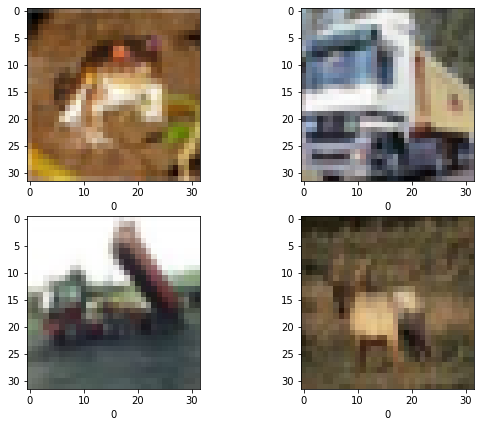

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(np.argmax(y_train[i]))
    
plt.show()

<font color = 'red'><font size = 4>converting images in  greyscale

In [6]:
# Convert both X_train and X_test to grayscale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [7]:
print("shape of training data (X)" ,X_train.shape)
print("shape of testing data(X)" ,X_test.shape)


shape of training data (X) (50000, 32, 32)
shape of testing data(X) (10000, 32, 32)


<font color = 'red'><font size = 4>displaying images in greyscale

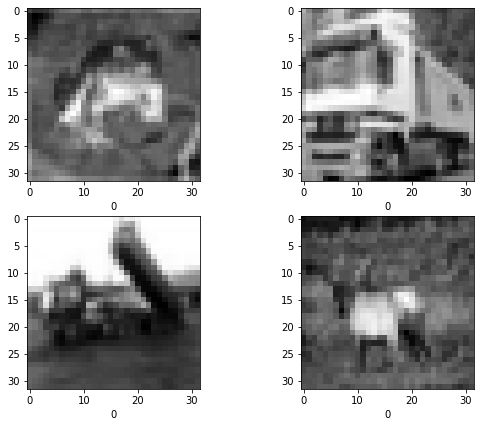

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.xlabel(np.argmax(y_train[i]))
    
plt.show()

<font color = 'red'><font size = 4>converting output column to desired form

In [9]:
ohe = OneHotEncoder(sparse=False)
y_train = ohe.fit_transform(y_train)
y_test = ohe.fit_transform(y_test)

In [10]:
X_train  = X_train/255
X_test  = X_test/255

<font color = 'red'><font size = 4>building model architecture (This is a basic architrcture used in CNN)

In [11]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same',input_shape=(32,32,1)))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(245, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

<font color = 'red'><font size = 4>fitting model

In [12]:
history = model.fit(X_train.reshape(50000, 32, 32,1), y_train, epochs=20, 
                    batch_size=32, validation_data=(X_test.reshape(10000, 32, 32,1), y_test), callbacks=[stop])


Epoch 1/20
1563/1563 [==============================] - 344s 219ms/step - loss: 1.9670 - acc: 0.2539 - val_loss: 1.3626 - val_acc: 0.5115
Epoch 2/20
1563/1563 [==============================] - 347s 222ms/step - loss: 1.3357 - acc: 0.5251 - val_loss: 1.0635 - val_acc: 0.6216
Epoch 3/20
1563/1563 [==============================] - 347s 222ms/step - loss: 1.0909 - acc: 0.6161 - val_loss: 0.9791 - val_acc: 0.6599
Epoch 4/20
1563/1563 [==============================] - 350s 224ms/step - loss: 0.9497 - acc: 0.6689 - val_loss: 0.9067 - val_acc: 0.6897
Epoch 5/20
1563/1563 [==============================] - 352s 225ms/step - loss: 0.8763 - acc: 0.6938 - val_loss: 0.8981 - val_acc: 0.6935
Epoch 6/20
1563/1563 [==============================] - 352s 225ms/step - loss: 0.8143 - acc: 0.7158 - val_loss: 0.8672 - val_acc: 0.7047
Epoch 7/20
1563/1563 [==============================] - 350s 224ms/step - loss: 0.7543 - acc: 0.7404 - val_loss: 0.8525 - val_acc: 0.7071
Epoch 8/20
1563/1563 [============

<font color = 'red'><font size = 4>predicting output on test data

In [13]:
y_test = ohe.inverse_transform(y_test)

predicted : [[8]]
actual : [8]
The actual image is : 


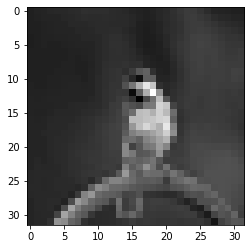

In [29]:
pred2 = model.predict(X_test[54 , :,:].reshape(1,32,32,1))
pred2 = ohe.inverse_transform(pred2)
print("predicted :" ,pred2)
print("actual :" ,y_test[54])
print("The actual image is : ")
plt.imshow(X_train[54],cmap='gray')
plt.show()

predicted : [[0]]
actual : [0]
The actual image is : 


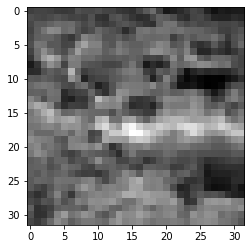

In [30]:
pred3 = model.predict(X_test[98 , :,:].reshape(1,32,32,1))
pred3 = ohe.inverse_transform(pred3)
print("predicted :" ,pred3)
print("actual :" ,y_test[98])
print("The actual image is : ")
plt.imshow(X_train[98],cmap='gray')
plt.show()

predicted : [[6]]
actual : [2]
The actual image is : 


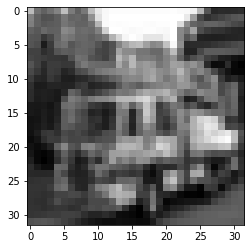

In [31]:

pred1 = model.predict(X_test[900 , :,:].reshape(1,32,32,1))
pred1 = ohe.inverse_transform(pred1)
print("predicted :" ,pred1)
print("actual :" ,y_test[900])
print("The actual image is : ")
plt.imshow(X_train[900],cmap='gray')
plt.show()

predicted : [[6]]
actual : [6]
The actual image is : 


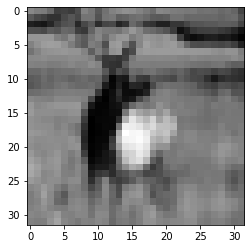

In [32]:
pred4 = model.predict(X_test[3030 , :,:].reshape(1,32,32,1))
pred4 = ohe.inverse_transform(pred4)
print("predicted :" ,pred4)
print("actual :" ,y_test[3030])
print("The actual image is : ")
plt.imshow(X_train[3030],cmap='gray')
plt.show()

In [24]:
cnn_pred = model.predict(X_test.reshape(10000,32,32,1))
cnn_pred = ohe.inverse_transform(cnn_pred)


<font color = 'red'><font size = 4>Evaluating model

In [ ]:
accuracy_score(y_test , cnn_pred)

0.7184

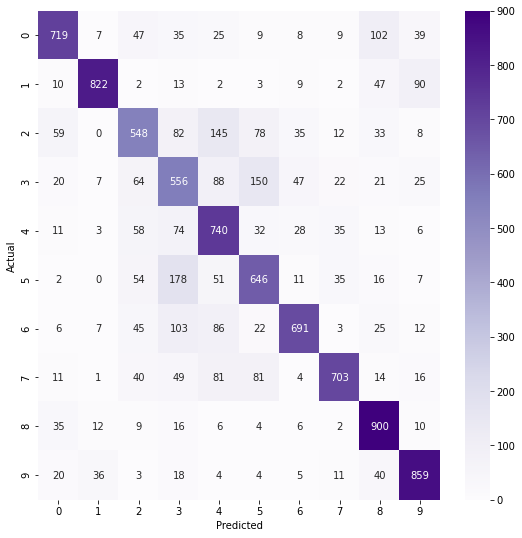

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, cnn_pred), fmt='d', annot=True, cmap=plt.cm.Purples)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<font color = 'red'><font size = 4>Implementing SVM

<font color = 'red'><font size = 4>data preperation

In [ ]:
arr=[]
for i in X_train:
  i=i.ravel()
  arr.append(i)
arr2=[]
for i in X_test:
  i=i.ravel()
  arr2.append(i)

In [ ]:
df_test=pd.DataFrame(arr2)

In [ ]:
df=pd.DataFrame(arr)

In [ ]:
data=pd.concat([df , df_test],axis=0)

In [ ]:
data.shape

(60000, 1024)

In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.243137,0.176471,0.184314,0.203922,0.274510,0.337255,0.396078,0.411765,0.439216,0.450980,0.384314,0.372549,0.435294,0.423529,0.396078,0.364706,0.396078,0.392157,0.352941,0.411765,0.407843,0.380392,0.388235,0.400000,0.447059,0.490196,0.513725,0.486275,0.490196,0.501961,0.474510,0.470588,0.078431,0.000000,0.027451,0.094118,0.180392,0.294118,0.313725,0.305882,...,0.286275,0.235294,0.109804,0.027451,0.341176,0.533333,0.227451,0.200000,0.545098,0.482353,0.509804,0.505882,0.556863,0.623529,0.619608,0.592157,0.552941,0.501961,0.478431,0.474510,0.474510,0.462745,0.427451,0.450980,0.466667,0.439216,0.400000,0.392157,0.396078,0.349020,0.325490,0.329412,0.356863,0.321569,0.250980,0.294118,0.521569,0.682353,0.439216,0.352941
1,0.694118,0.529412,0.396078,0.396078,0.521569,0.662745,0.760784,0.788235,0.603922,0.454902,0.407843,0.407843,0.470588,0.501961,0.737255,0.886275,0.827451,0.647059,0.635294,0.611765,0.443137,0.376471,0.349020,0.337255,0.274510,0.235294,0.219608,0.298039,0.360784,0.341176,0.329412,0.301961,0.627451,0.596078,0.482353,0.505882,0.639216,0.650980,0.745098,0.745098,...,0.058824,0.262745,0.203922,0.196078,0.286275,0.372549,0.458824,0.490196,0.552941,0.552941,0.588235,0.521569,0.129412,0.043137,0.062745,0.270588,0.490196,0.431373,0.396078,0.364706,0.243137,0.117647,0.078431,0.078431,0.137255,0.152941,0.086275,0.027451,0.027451,0.039216,0.086275,0.176471,0.254902,0.364706,0.454902,0.509804,0.521569,0.533333,0.537255,0.537255
2,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.988235,0.992157,0.952941,0.878431,0.949020,0.925490,0.964706,0.988235,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.294118,0.254902,0.258824,0.290196,0.301961,0.290196,0.294118,0.325490,0.431373,0.403922,0.388235,0.364706,0.349020,0.341176,0.345098,0.356863,0.364706,0.368627,0.352941,0.356863,0.345098,0.337255,0.352941,0.360784,0.364706,0.360784,0.356863,0.345098,0.329412,0.298039,0.298039,0.317647,0.305882,0.262745,0.250980,0.274510,0.305882,0.329412,0.329412,0.333333
3,0.082353,0.117647,0.121569,0.129412,0.137255,0.129412,0.133333,0.074510,0.090196,0.101961,0.070588,0.101961,0.129412,0.172549,0.235294,0.164706,0.129412,0.129412,0.105882,0.109804,0.125490,0.141176,0.180392,0.262745,0.168627,0.145098,0.203922,0.192157,0.141176,0.235294,0.250980,0.266667,0.094118,0.101961,0.090196,0.113725,0.098039,0.113725,0.117647,0.121569,...,0.368627,0.352941,0.356863,0.349020,0.321569,0.266667,0.250980,0.274510,0.290196,0.278431,0.274510,0.309804,0.313725,0.305882,0.313725,0.250980,0.239216,0.278431,0.301961,0.309804,0.305882,0.301961,0.321569,0.364706,0.321569,0.309804,0.305882,0.360784,0.305882,0.349020,0.290196,0.223529,0.290196,0.239216,0.262745,0.266667,0.203922,0.164706,0.200000,0.235294
4,0.721569,0.713725,0.741176,0.772549,0.788235,0.784314,0.792157,0.784314,0.784314,0.780392,0.792157,0.788235,0.788235,0.780392,0.784314,0.772549,0.772549,0.772549,0.772549,0.768627,0.764706,0.768627,0.760784,0.760784,0.760784,0.756863,0.749020,0.737255,0.737255,0.737255,0.729412,0.725490,0.725490,0.737255,0.733333,0.717647,0.760784,0.784314,0.784314,0.784314,...,0.294118,0.294118,0.282353,0.274510,0.298039,0.313725,0.294118,0.294118,0.294118,0.298039,0.294118,0.294118,0.321569,0.329412,0.333333,0.356863,0.349020,0.356863,0.352941,0.368627,0.364706,0.372549,0.376471,0.384314,0.388235,0.388235,0.384314,0.388235,0.376471,0.368627,0.349020,0.337255,0.325490,0.313725,0.313725,0.298039,0.294118,0.309804,0.294118,0.301961


<font color = 'red'><font size = 4>dimentionality reduction with PCA

In [ ]:
pca = PCA(n_components=100)
reduced=pca.fit_transform(data)

In [ ]:
reduced.shape

(60000, 100)

In [ ]:
print(sum(pca.explained_variance_ratio_))

0.9222970113935671


In [ ]:
y_train=ohe.inverse_transform(y_train)

<font color = 'red'><font size = 4>training , predicting model

In [ ]:
svm = SVC(C=1.0, kernel='linear', gamma='scale', 
                cache_size=200, class_weight=None, verbose=True, max_iter=- 1,random_state=42)
svm.fit(reduced[0:50000][:], y_train.ravel())


[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

In [ ]:
svm_pred=svm.predict(reduced[50000:60000][:])

<font color = 'red'><font size = 4>model evaluation

In [ ]:
accuracy_score(y_test , svm_pred)

0.3255

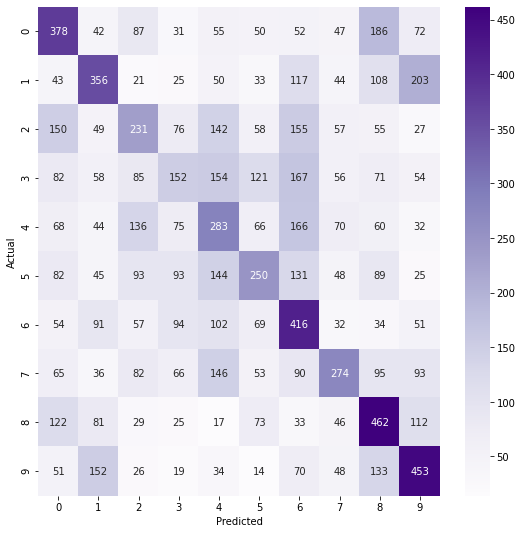

In [ ]:
ohe=OneHotEncoder(sparse=False)
y_test_o=ohe.fit_transform(y_test)
svm_pred_o=ohe.fit_transform(svm_pred)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test_o.argmax(axis=1), svm_pred_o.argmax(axis=1)), fmt='d', annot=True, cmap=plt.cm.Purples)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<font color = 'red'><font size = 4>Trying linear discriminant analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(df, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lpred=lda.predict(df_test)

In [ ]:
accuracy_score(y_test , lpred)

0.283

<font color = 'red'><font size = 4>Training XGboost model after dimentionality reductuin

In [ ]:
x_train=pd.DataFrame(reduced[0:50000][:])
x_test=pd.DataFrame(reduced[50000:60000][:])
y_train=pd.DataFrame(y_train)
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(x_train, y_train)

xg_pred = xgb_model.predict(x_test)

#print(confusion_matrix(y, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_score(y_test , xg_pred)

0.3679

<font color = 'red'><font size = 4>Training random forest model after dimentionality reduction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)
rf_pred=classifier.predict(x_test)
accuracy_score(y_test , rf_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.3718

In [ ]:
print(accuracy_score(y_test , rf_pred))

0.3718


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rf_pred=classifier.predict(x_test)

In [ ]:
accuracy_score(y_test , rf_pred)

0.4265

<font color = 'red'><font size = 4>Training navive bayes after dimentionality reduction

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train, y_train)
gnb_predictions = gnb.predict(x_test)
  
# accuracy on X_test
accuracy = gnb.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(accuracy)

0.2799
